
References: 
1. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. https://en.wikipedia.org/wiki/List_of_dynamical_systems_and_differential_equations_topics
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf (also in downloads)
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn poster - http://roseyu.com/Materials/nips17-tsw-poster.pdf
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [173]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [144]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [145]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM, SimpleRNN
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

## Generate Time Series using the Lorenz System of DE

In [146]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    # Label the axes
    ax.set_title('The Lorenz Attractor')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [147]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting at zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [148]:
sigma=10.0
beta=8.0/3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [149]:
#print (t)

In [150]:

N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[  0.80065823 -12.33016722   8.26246437]
 [-10.04051374   2.45064928 -11.83228086]
 [-14.59461782   7.36038453   3.47849755]
 [  5.80239579  -0.75262019  -6.53400214]
 [  3.73288869   9.86126126  -0.11511146]]
Random point1 =  [0.8424733  0.10027994 0.83942716]
shape of t =  (1000,)
 lor1 =  [[  0.8424733    0.10027994   0.83942716]
 [  0.8151223    0.18980231   0.83099086]
 [  0.79229653   0.27627304   0.82291121]
 ...
 [ -9.26430283 -10.78558063  25.92303665]
 [ -9.32465238 -10.81731306  26.04758   ]
 [ -9.38379334 -10.84469973  26.17447275]]
shape of lor1 =  (1000, 3)


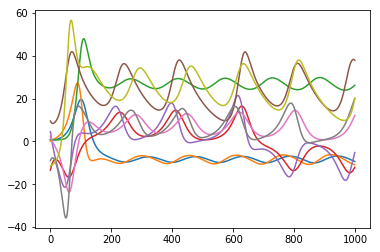

In [151]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

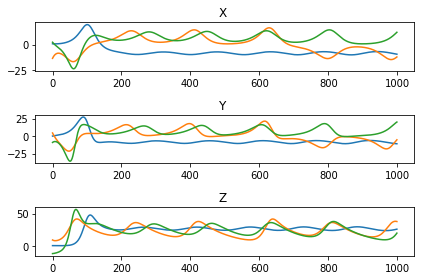

In [152]:
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.tight_layout() #add spacing between subplots
plt.show()

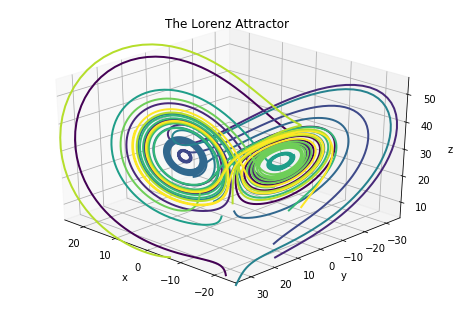

In [153]:
t, x_t = solve_lorenz_graph(angle=134, N=10) #angle initially at 0, butterfly at 134

In [154]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

A Jupyter Widget

In [155]:
#t, x_t = widget.result

In [156]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, change to 100 later

In [157]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [158]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [159]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [160]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [161]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [162]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [163]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (lorenz_test.shape)
print (len(lorenz_train))

(7, 1000, 3)
(3, 1000, 3)
7


In [164]:
# reshape input to be [samples, time steps, features]
'''
trainX = np.reshape(lorenz_train, (lorenz_train.shape[0], 1, lorenz_train.shape[1]))
testX = np.reshape(lorenz_test, (lorenz_test.shape[0], 1, lorenz_test.shape[1]))
print(trainX.shape)
print(testX.shape)
'''

'\ntrainX = np.reshape(lorenz_train, (lorenz_train.shape[0], 1, lorenz_train.shape[1]))\ntestX = np.reshape(lorenz_test, (lorenz_test.shape[0], 1, lorenz_test.shape[1]))\nprint(trainX.shape)\nprint(testX.shape)\n'

In [165]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print ("Shape of training output: " , y_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of training output:  (7912, 3)
Shape of test input:  (3956, 10, 3)
Shape of testing output:  (3956, 3)


In [166]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [167]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


In [168]:
print (x_test[1])

[[13.30158439 -4.35137818  5.43762841]
 [12.63245662 -3.15868945  5.18607122]
 [12.03537919 -2.01748237  5.00395449]
 [11.50555101 -0.92525235  4.88190821]
 [11.03846858  0.12101607  4.81206154]
 [10.62993013  1.12464381  4.78786651]
 [10.27603255  2.08910202  4.80393473]
 [ 9.97316317  3.01789585  4.85588914]
 [ 9.71798789  3.91447848  4.94023197]
 [ 9.50743691  4.78218811  5.05422845]]


In [169]:
print (y_test[1])

[9.33868889 5.62420225 5.19580543]


## Build Neural Network model in Keras

In [170]:
print('Build LSTM model...')
model = Sequential()
model.add(LSTM(16, input_shape=(None, 3)))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build LSTM model...
Train...


In [174]:
print('Build RNN model...')
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')
print('Train RNN...')

Build RNN model...
Train RNN...


In [175]:
print('Train LSTM model...')
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=75)

Train LSTM model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/75
 - 4s - loss: 0.7630 - val_loss: 0.6270
Epoch 2/75
 - 4s - loss: 0.6750 - val_loss: 0.5551
Epoch 3/75
 - 4s - loss: 0.5816 - val_loss: 0.5142
Epoch 4/75
 - 4s - loss: 0.5197 - val_loss: 0.4604
Epoch 5/75
 - 4s - loss: 0.4492 - val_loss: 0.4091
Epoch 6/75
 - 4s - loss: 0.3863 - val_loss: 0.3807
Epoch 7/75
 - 4s - loss: 0.3425 - val_loss: 0.3433
Epoch 8/75
 - 4s - loss: 0.2797 - val_loss: 0.3071
Epoch 9/75
 - 4s - loss: 0.2491 - val_loss: 0.2864
Epoch 10/75
 - 4s - loss: 0.2150 - val_loss: 0.2449
Epoch 11/75
 - 4s - loss: 0.1793 - val_loss: 0.2598
Epoch 12/75
 - 4s - loss: 0.1608 - val_loss: 0.1982
Epoch 13/75
 - 4s - loss: 0.1440 - val_loss: 0.1799
Epoch 14/75
 - 4s - loss: 0.1111 - val_loss: 0.1599
Epoch 15/75
 - 4s - loss: 0.0933 - val_loss: 0.1476
Epoch 16/75
 - 4s - loss: 0.0792 - val_loss: 0.1339
Epoch 17/75
 - 4s - loss: 0.0713 - val_loss: 0.1338
Epoch 18/75
 - 4s - loss: 0.0568 - val_loss: 0.1077
Epoch

In [176]:
print('Train RNN model...')
RNNmodel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=75)

Train RNN model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/75
 - 2s - loss: 246.2392 - val_loss: 196.4232
Epoch 2/75
 - 1s - loss: 179.1743 - val_loss: 148.1604
Epoch 3/75
 - 2s - loss: 137.4343 - val_loss: 112.7677
Epoch 4/75
 - 1s - loss: 104.7223 - val_loss: 85.9244
Epoch 5/75
 - 1s - loss: 79.9731 - val_loss: 66.1815
Epoch 6/75
 - 1s - loss: 61.6762 - val_loss: 51.6073
Epoch 7/75
 - 1s - loss: 48.1692 - val_loss: 40.7940
Epoch 8/75
 - 1s - loss: 38.0974 - val_loss: 32.6321
Epoch 9/75
 - 1s - loss: 30.5813 - val_loss: 26.4736
Epoch 10/75
 - 1s - loss: 24.9243 - val_loss: 21.5846
Epoch 11/75
 - 1s - loss: 20.6491 - val_loss: 17.7950
Epoch 12/75
 - 1s - loss: 17.3703 - val_loss: 14.7877
Epoch 13/75
 - 1s - loss: 14.7999 - val_loss: 12.3684
Epoch 14/75
 - 1s - loss: 12.7507 - val_loss: 10.4803
Epoch 15/75
 - 1s - loss: 11.0864 - val_loss: 8.9162
Epoch 16/75
 - 1s - loss: 9.6997 - val_loss: 7.6545
Epoch 17/75
 - 1s - loss: 8.5253 - val_loss: 6.6036
Epoch 18/75
 - 1s - lo

## Plot original values and predictions

In [177]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
RNNtrainPredict = RNNmodel.predict(x_train)
RNNtestPredict = RNNmodel.predict(x_test)

Graphing LSTM and RNN on Training data 


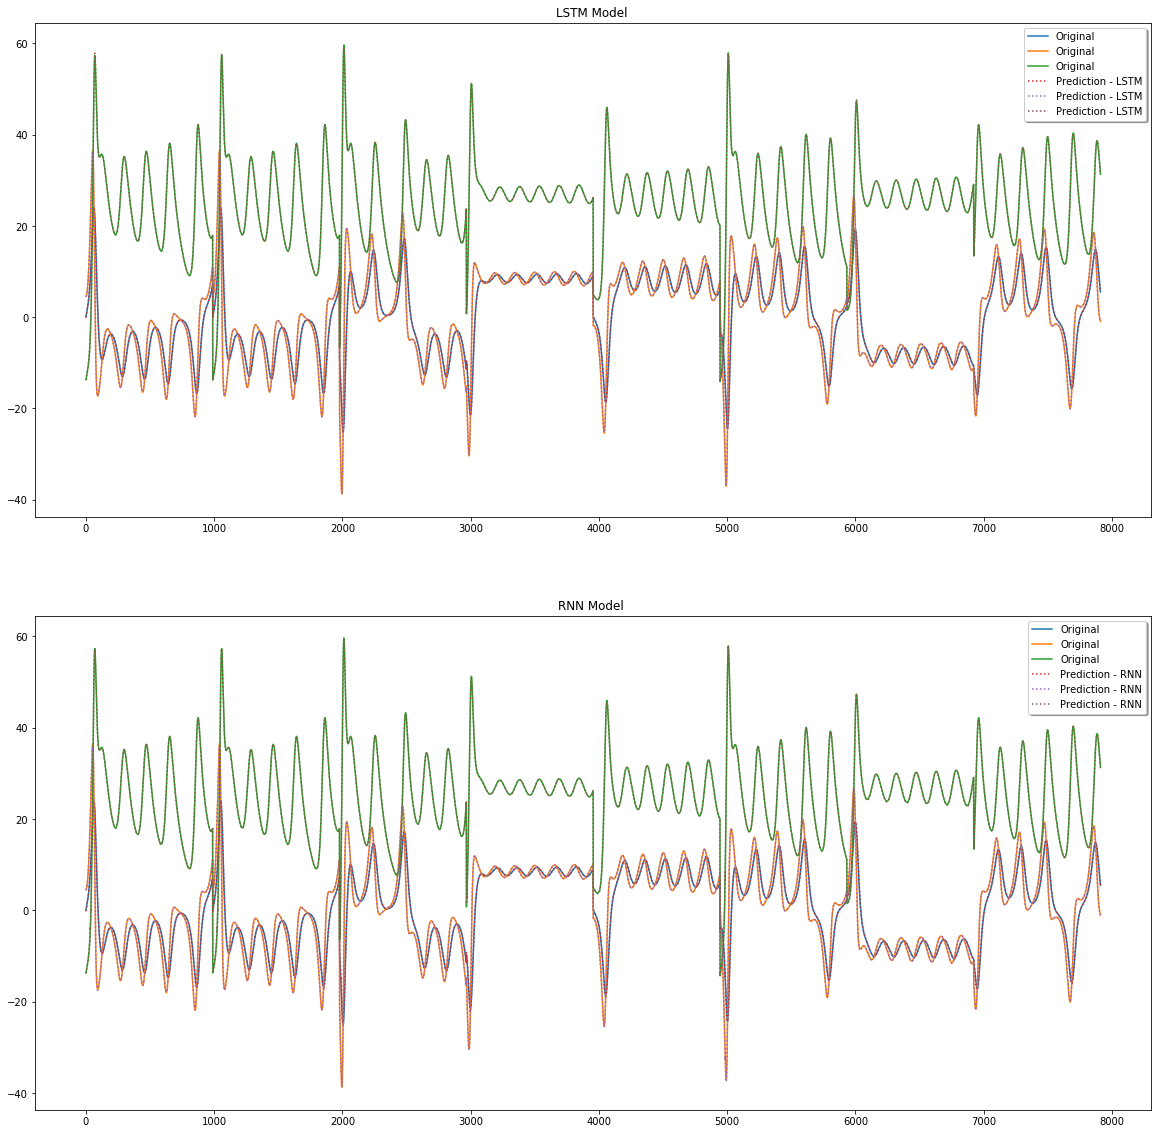

In [201]:
from matplotlib import pyplot as plt
# plot baseline and predictions
print("Graphing LSTM and RNN on Training data ")
plt.figure(figsize=(20,20))
plt.subplot(2 ,1, 1)
plt.title("LSTM Model ")
plt.plot(y_train, linestyle='-', label='Original')
plt.plot(trainPredict, linestyle=':', label='Prediction - LSTM')
plt.legend(loc='upper right', shadow=True)

plt.subplot(2, 1, 2)
plt.title("RNN Model ")
plt.plot(y_train, linestyle='-', label='Original')
plt.plot(RNNtrainPredict, linestyle=':', label='Prediction - RNN')
plt.legend(loc='upper right', shadow=True)
plt.show()


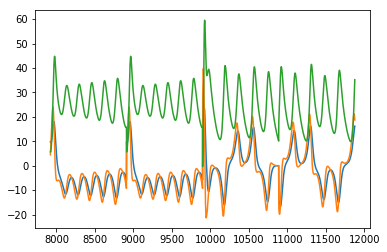

In [179]:
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list, testPredict) # plot baseline and predictions

In [180]:
print(trainPredict-y_train)

[[-0.02862919 -0.01818034 -0.05232493]
 [-0.01865486 -0.00961611 -0.08104911]
 [-0.00803185 -0.00683337 -0.09342019]
 ...
 [ 0.00470286  0.04059249 -0.03376332]
 [ 0.00926025  0.04525224 -0.03284827]
 [ 0.01360062  0.0497233  -0.03199574]]


## Calculate difference between prediction and actual

Graphing LSTM true test output against predicted output 


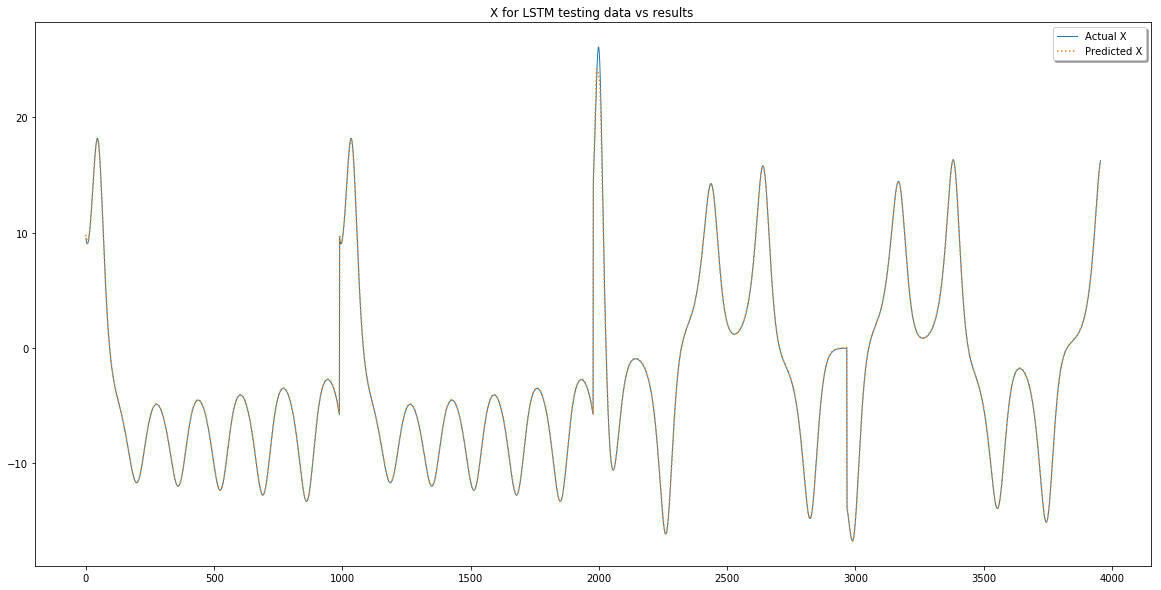

In [181]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for LSTM testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


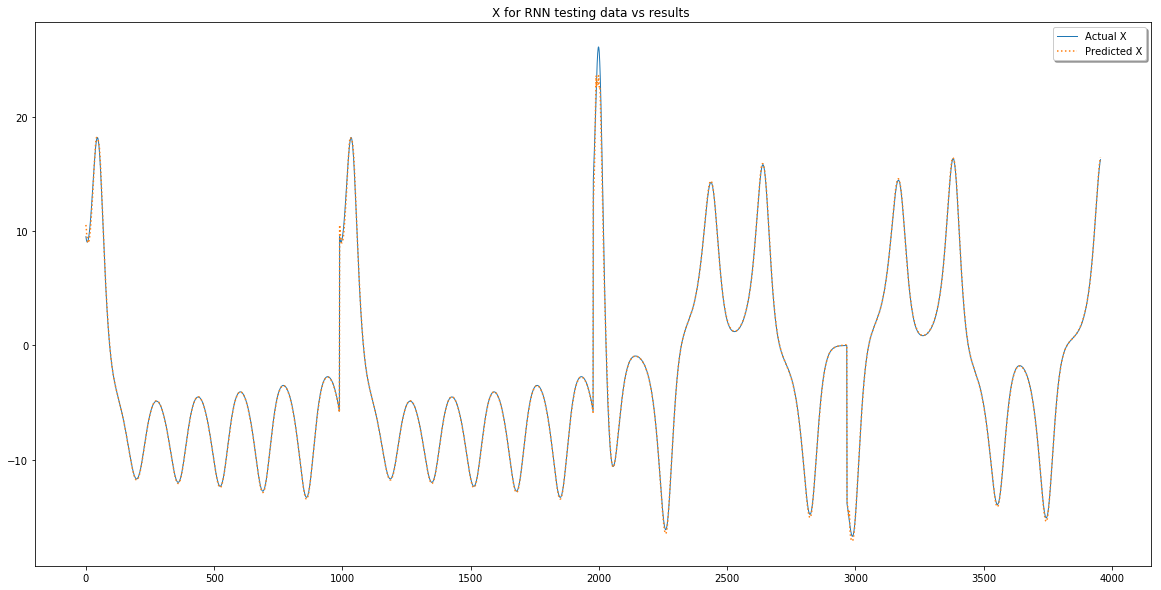

In [182]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for RNN testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(RNNtestPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing LSTM true test output against predicted output 


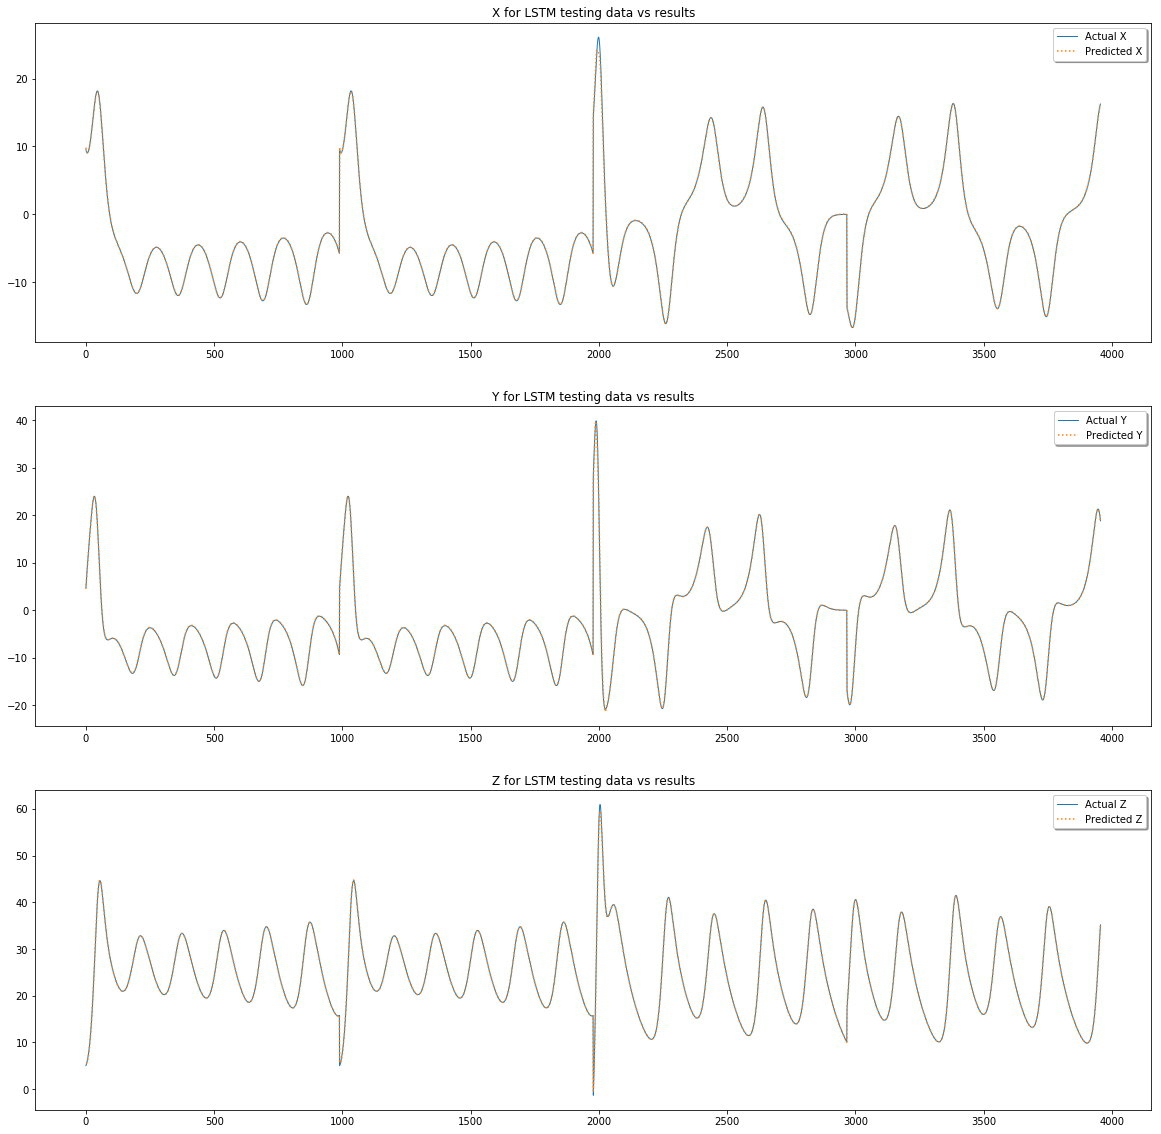

In [183]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X for LSTM testing data vs results")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y for LSTM testing data vs results")
plt.plot(y_test[:,1:2], linewidth=1.0, label='Actual Y')
plt.plot(testPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z for LSTM testing data vs results")
plt.plot(y_test[:,2:3], linewidth=1.0, label='Actual Z')
plt.plot(testPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


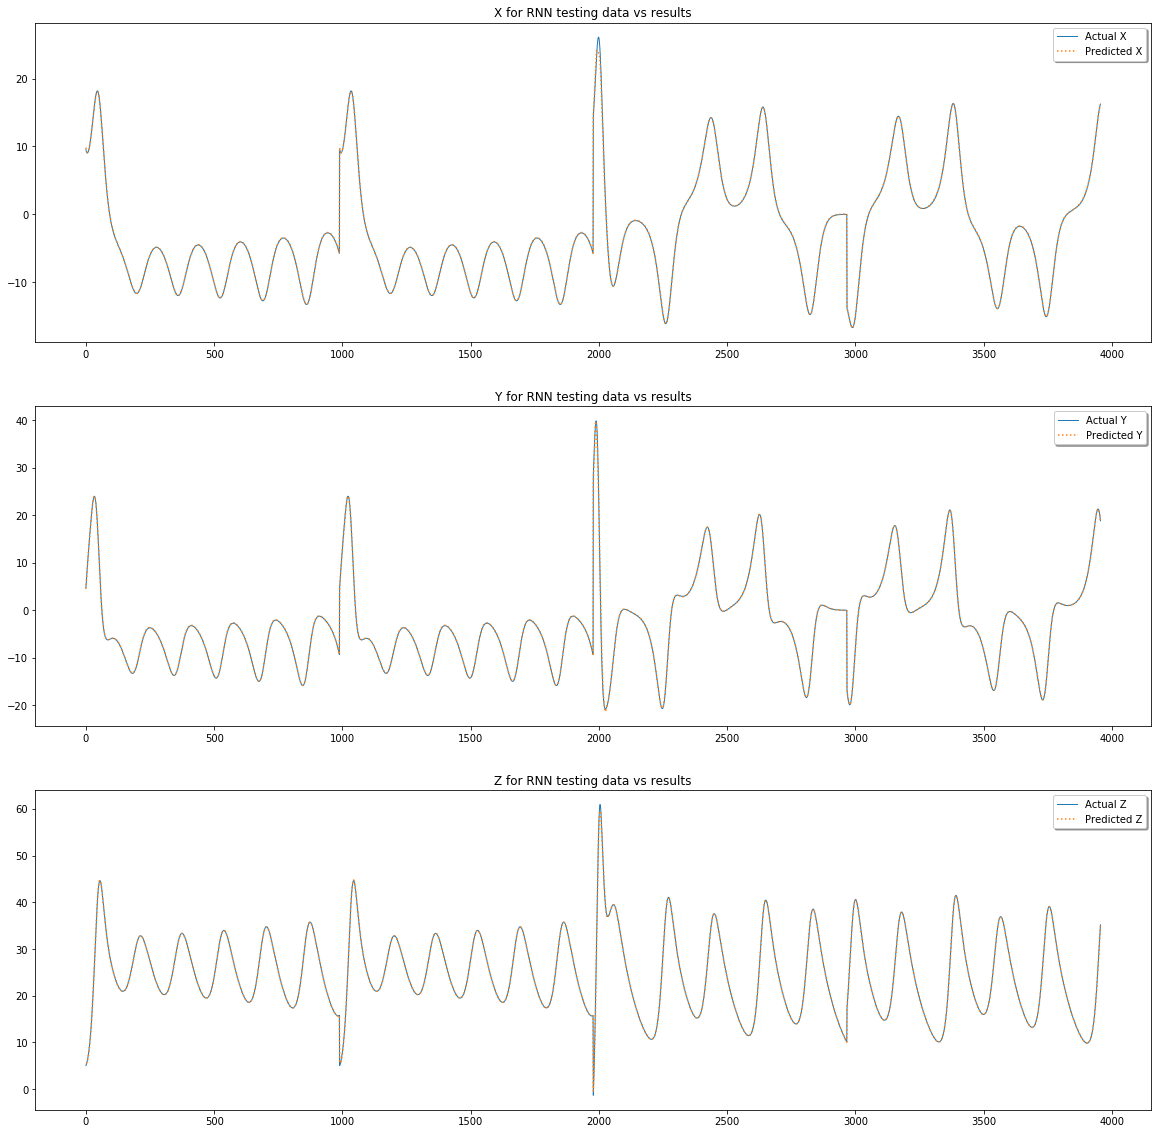

In [184]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X for RNN testing data vs results")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y for RNN testing data vs results")
plt.plot(y_test[:,1:2], linewidth=1.0, label='Actual Y')
plt.plot(testPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z for RNN testing data vs results")
plt.plot(y_test[:,2:3], linewidth=1.0, label='Actual Z')
plt.plot(testPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [185]:
print (y_test.shape)
print (y_test)

(3956, 3)
[[ 9.50743691  4.78218811  5.05422845]
 [ 9.33868889  5.62420225  5.19580543]
 [ 9.20915422  6.44350491  5.36346359]
 ...
 [15.98936717 19.81395459 33.41044267]
 [16.1306741  19.35847338 34.30881879]
 [16.2473985  18.84463462 35.17646154]]


In [186]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(3956, 1, 3)
[[[ 9.50743691  4.78218811  5.05422845]]

 [[ 9.33868889  5.62420225  5.19580543]]

 [[ 9.20915422  6.44350491  5.36346359]]

 ...

 [[15.98936717 19.81395459 33.41044267]]

 [[16.1306741  19.35847338 34.30881879]]

 [[16.2473985  18.84463462 35.17646154]]]


In [187]:
print (testPredict.shape)
print (testPredict)

(3956, 3)
[[ 9.825093   4.469693   5.685031 ]
 [ 9.652119   5.22471    5.674603 ]
 [ 9.481064   6.1222935  5.636427 ]
 ...
 [15.882346  19.683752  33.43018  ]
 [16.03637   19.228308  34.32784  ]
 [16.165632  18.724293  35.18974  ]]


In [188]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[[ 3.17656363e-01 -3.12494926e-01  6.30802482e-01]
  [ 1.44681776e-01  4.42521878e-01  6.20374530e-01]
  [-2.63730640e-02  1.34010536e+00  5.82198471e-01]
  ...
  [ 6.37490925e+00  1.49015639e+01  2.83759511e+01]
  [ 6.52893242e+00  1.44461196e+01  2.92736104e+01]
  [ 6.65819534e+00  1.39421046e+01  3.01355108e+01]]

 [[ 4.86404378e-01 -1.15450906e+00  4.89225511e-01]
  [ 3.13429791e-01 -3.99492258e-01  4.78797559e-01]
  [ 1.42374951e-01  4.98091227e-01  4.40621499e-01]
  ...
  [ 6.54365726e+00  1.40595498e+01  2.82343742e+01]
  [ 6.69768043e+00  1.36041055e+01  2.91320335e+01]
  [ 6.82694336e+00  1.31000905e+01  2.99939338e+01]]

 [[ 6.15939050e-01 -1.97381172e+00  3.21567345e-01]
  [ 4.42964464e-01 -1.21879492e+00  3.11139393e-01]
  [ 2.71909624e-01 -3.21211436e-01  2.72963333e-01]
  ...
  [ 6.67319193e+00  1.32402472e+01  2.80667160e+01]
  [ 6.82721510e+00  1.27848028e+01  2.89643753e+01]
  [ 6.95647803e+00  1.22807878e+01  2.98262756e+01]]

 ...

 [[-6.16427390e+00 -1.53442614e+01

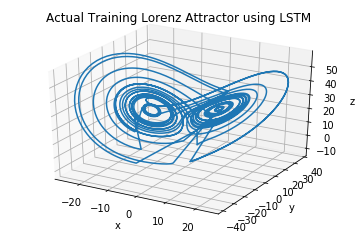

In [189]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Actual Training Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(y_train[:,0],y_train[:,1],y_train[:,2])
plt.show()

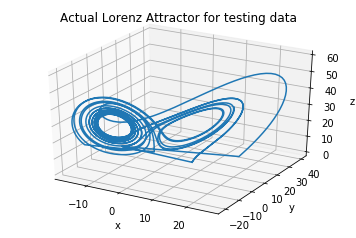

In [190]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Actual Lorenz Attractor for testing data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(y_test[:,0],y_test[:,1],y_test[:,2])
plt.show()

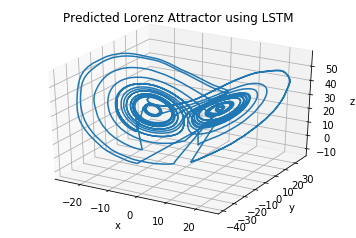

In [191]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(trainPredict[:,0],trainPredict[:,1],trainPredict[:,2])
plt.show()

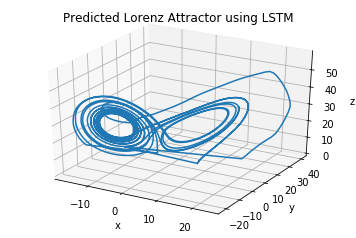

In [192]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(testPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

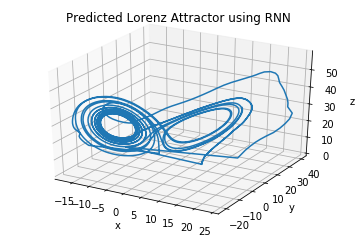

In [193]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using RNN')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(RNNtestPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

## Testing with single starting point - predicting 1 ahead

In [194]:
SEQUENCE_SIZE = 10
single_t, single_lor = solve_lorenz(N=1) #try 10 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
singlePredict = model.predict(single_x)
RNNsinglePredict = RNNmodel.predict(single_x)
print ("Shape of data: ", single_lor.shape)
print ("Shape of windowed data: ", single_x.shape)

Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)


Graphing LSTM true test output against predicted output 


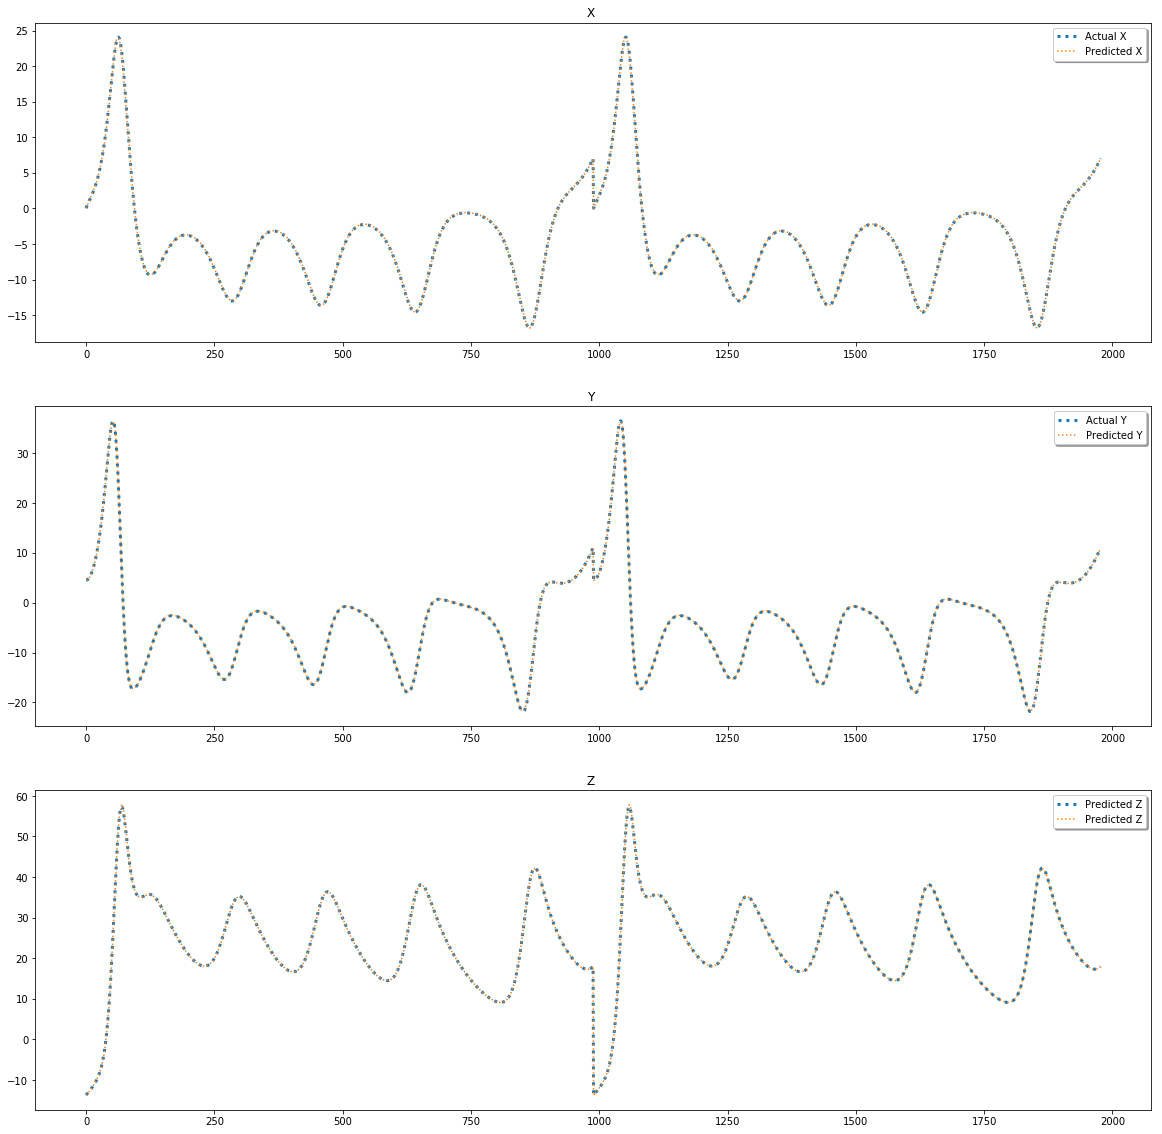

In [195]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X')
plt.plot(singlePredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(singlePredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Predicted Z')
plt.plot(singlePredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


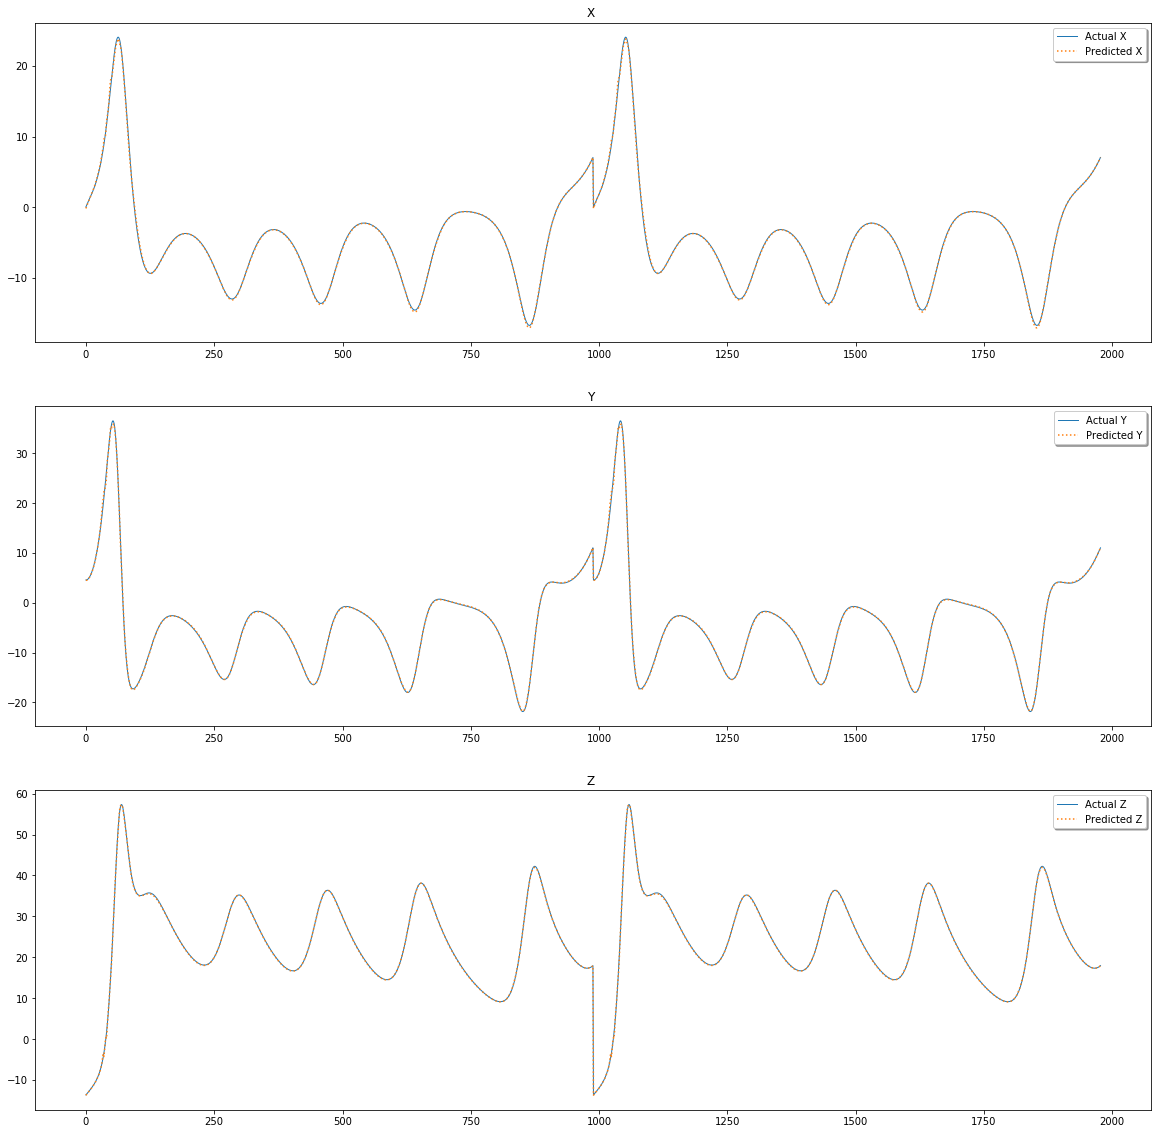

In [196]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=1.0, linestyle='-', label='Actual X' )
plt.plot(RNNsinglePredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=1.0, linestyle='-', label='Actual Y')
plt.plot(RNNsinglePredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=1.0, linestyle='-', label='Actual Z')
plt.plot(RNNsinglePredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [197]:
print ("Calculating LSTM error with single time series")
print("Shape of output: ",single_y.shape)
err3D = single_y - singlePredict
err1D = (single_y - singlePredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating LSTM error with single time series
Shape of output:  (1978, 3)
Average error =  0.09410667635011637


In [198]:
print ("Calculating RNN error with single time series")
print("Shape of output: ",single_y.shape)
RNNerr3D = single_y - RNNsinglePredict
RNNerr1D = (single_y - RNNsinglePredict)**2
RNNerr1D = RNNerr1D.sum(axis=-1)
RNNerr1D = np.sqrt(RNNerr1D)
RNNaveErr = np.average(RNNerr1D)
print("Average error = ", RNNaveErr)

Calculating RNN error with single time series
Shape of output:  (1978, 3)
Average error =  0.1691547258621755


Graphing true test output against predicted output 


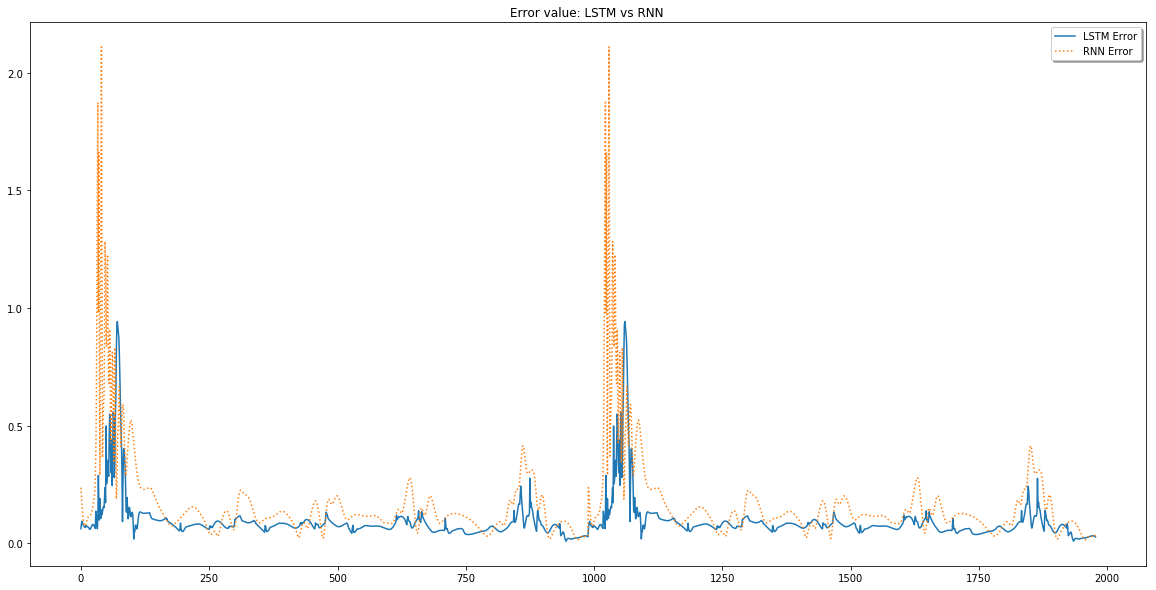

In [199]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("Error value: LSTM vs RNN ")
plt.plot(err1D, linestyle='-', label='LSTM Error')
plt.plot(RNNerr1D, linestyle=':', label='RNN Error')
plt.legend(loc='upper right', shadow=True)
plt.show()